In [1]:
import pandas as pd
import requests
import os
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Read in data and look at it's structure.

In [2]:
url="https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Concrete%20Compressive%20Strength/Concrete_Data.xls"
    
if not os.path.exists("concrete.csv"):
    read_file = pd.read_excel(url)
    read_file.to_csv("concrete.csv", index=False)
    
df = pd.read_csv("concrete.csv")
print(df.shape)
df.head()

(1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Rename variables and add a variable if the mix would be ACI Approved.

In [3]:
df= df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
                       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast Furnace Slag',
                      'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash',
                      'Water  (component 4)(kg in a m^3 mixture)':'Water',
                      'Superplasticizer (component 5)(kg in a m^3 mixture)':"Superplasticizer",
                      'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"Coarse Aggregate",
                      "Fine Aggregate (component 7)(kg in a m^3 mixture)":"Fine Aggregate",
                      "Age (day)":"Age",
                      'Concrete compressive strength(MPa, megapascals) ':"Compressive Strength"})
df["ACI Approved"]=df["Compressive Strength"]>31.026
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength,ACI Approved
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,True
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,True
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,True
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,True
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,True


Look at what age the concrete is measured.

In [4]:
df["Age"].value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: Age, dtype: int64

How often is the mix ACI approved on the day of measurment.

In [5]:
df["ACI Approved"].value_counts() / len(df)

True     0.598058
False    0.401942
Name: ACI Approved, dtype: float64

How does age effect the compresive strength of concrete? Does  the amount of water slow down curing process of concrete?

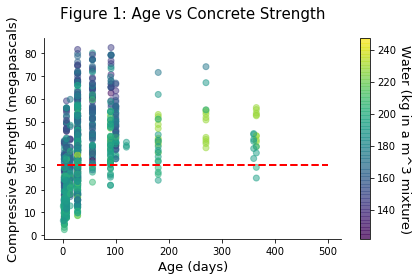

In [6]:
fig,ax=plt.subplots()
graph=ax.scatter(df["Age"],df["Compressive Strength"],alpha=.5,c=df["Water"])
ax.set_title("Figure 1: Age vs Concrete Strength",pad=20,size=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel("Compressive Strength (megapascals)",size=13)
ax.set_xlabel("Age (days)",size=13)
ax.plot([-10,500],[31.026,31.026],'r--',lw=2)
cbar=fig.colorbar(graph,ax=ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Water (kg in a m^3 mixture)', rotation=270,size=13)
fig.tight_layout()
fig.savefig('fig1.png')

What proportion of the mixes that are LESS than 30 days old are ACI Approved?

In [7]:
df2=df[(df["Age"]<30)]
len(df2[df2["ACI Approved"]])/len(df2)

0.472630173564753

What proportion of the mixes that are MORE than 30 days old are ACI Approved?

In [8]:
df3=df[(df["Age"]>30)]
len(df3[df3["ACI Approved"]])/len(df3)

0.9323843416370107

What proportion of the mixes that are less than 30 days old and have LESS that 181.5kg of water are ACI Approved?

In [9]:
df4=df[(df["Age"]<30)]
df4=df4[df4["Water"]<181.5]
len(df4[df4["ACI Approved"]])/len(df4)

0.6295180722891566

What proportion of the mixes that are less than 30 days old and have MORE that 181.5kg of water are ACI Approved?

In [10]:
df5=df[(df["Age"]<30)]
df5=df5[df5["Water"]>181.5]
len(df5[df5["ACI Approved"]])/len(df5)

0.34772182254196643

Split the data into two groups with 75% training and 25% testing

In [11]:
train, test = train_test_split(df)
train.shape, test.shape

((772, 10), (258, 10))

In [12]:
xcols=['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age']
ycol='ACI Approved'

Look at the demensionality of the data with a pricipal component analysis. Is standard scaling needed?

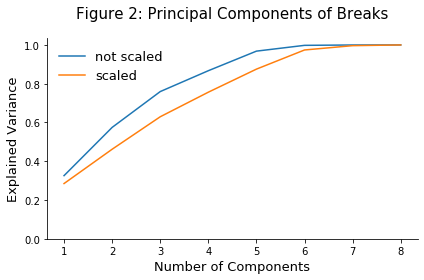

In [13]:
fig,ax=plt.subplots()
lr= Pipeline([
    ("pca", PCA())
])
lr.fit(df[xcols])
explained = lr["pca"].explained_variance_
variance = pd.Series(explained.cumsum() / explained.sum(),
              index=range(1, len(xcols)+1))
ax = variance.plot.line(label="not scaled", ylim=0)
lr= Pipeline([
    ("std", StandardScaler()),
    ("pca", PCA())
])
lr.fit(df[xcols])
explained = lr["pca"].explained_variance_
variance = pd.Series(explained.cumsum() / explained.sum(),
              index=range(1, len(xcols)+1))
variance.plot.line(label="scaled", ax=ax)
ax.set_xlabel("Number of Components",size=13)
ax.set_ylabel("Explained Variance",size=13)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(frameon=False, prop={'size': 13})
ax.set_title("Figure 2: Principal Components of Breaks", pad=20,size=15)
fig.tight_layout()
fig.savefig('fig2.png')

After standard scaling, how much significant information does 6 or 7 components capture?

In [14]:
variance[6]

0.974028644432981

In [15]:
variance[7]

0.9962447138588296

Use Sklearn pipeline with standard scaler and logistic regression.

In [16]:
lr = Pipeline([
        ("std", StandardScaler()),
        ("lr", LogisticRegression()),
    ])
lr.fit(train[xcols],train[ycol])
print("Score: ",lr.score(test[xcols],test[ycol]))
print("Recall: ", recall_score(test[ycol], lr.predict(test[xcols])))
print("Precision: ", precision_score(test[ycol], lr.predict(test[xcols])))
print("Confusion matrix: ",confusion_matrix(test[ycol], lr.predict(test[xcols])) / len(test) * 100)


Score:  0.872093023255814
Recall:  0.8562091503267973
Precision:  0.9225352112676056
Confusion matrix:  [[36.43410853  4.26356589]
 [ 8.52713178 50.7751938 ]]


What are the coefficient weights for each of the features?

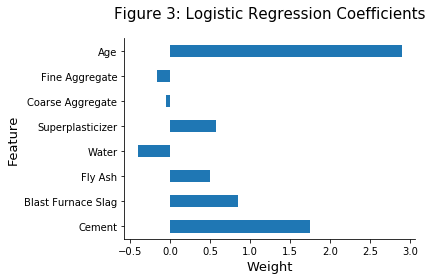

In [17]:
fig,ax=plt.subplots()
ax = pd.Series(lr["lr"].coef_[0], index=xcols).plot.barh()
ax.set_xlabel("Weight",size=13)
ax.set_ylabel("Feature",size=13)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Figure 3: Logistic Regression Coefficients", pad=20,size=15)
fig.tight_layout()
fig.savefig('fig3.png')